In [24]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_csv('./database/Customer.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<IPython.core.display.Javascript object>

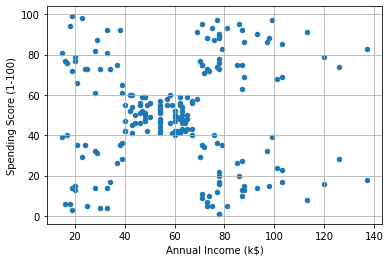

In [45]:
X = dataset.iloc[:, [3, 4]]

dataset.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')
plt.grid(1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

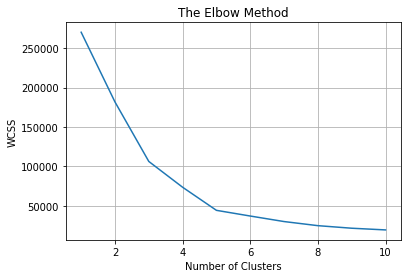

In [32]:
wcss = [] # Within Centroid Sum of Squares

for k in (range(1, 11)):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#     break

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(1)

Now, from the Elbow method, we got 2 elbows:
* At n_cluster = 3
* At n_cluster = 5

But, we'll select **n_cluster=5** because it has a lower WCSS Score.

In [35]:
N_CLUSTER = 5

kmeans = KMeans(n_clusters=N_CLUSTER, init='k-means++')
clusters = kmeans.fit_predict(X)
len(clusters)

200

In [49]:
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

<IPython.core.display.Javascript object>

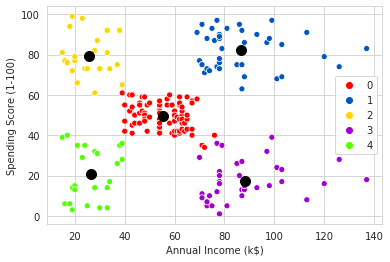

In [83]:
import seaborn as sns
# sns.color_palette("hls", 8)

sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=clusters, palette="prism", legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='k', label='Cluster Centre')